<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/DBSCAN_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DBSCAN -Mall_Customers

### About DBSCAN:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm used in data mining and machine learning. It was introduced by Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu in 1996. DBSCAN is designed to find clusters of data points that are close to each other in the feature space and separate them from regions of lower data point density.

*   Parameters:
"eps" (Epsilon): This parameter defines the maximum distance that two data points can be from each other to be considered neighbors.
"minPts" (Minimum Points): This parameter specifies the minimum number of data points within the "eps" distance to classify a point as a core point.

*   Advantages:
DBSCAN can handle clusters of arbitrary shapes.
It can discover clusters of varying sizes and densities.
It is robust to noise and can automatically detect and remove outliers.
DBSCAN does not require a predefined number of clusters.

*   Disadvantages:
DBSCAN's performance can be sensitive to the choice of parameters "eps" and "minPts."
It may struggle with datasets with varying densities.
It is not suitable for high-dimensional data due to the "curse of dimensionality."

In summary, DBSCAN is a density-based clustering algorithm that groups data points into clusters based on their proximity and density. It is a powerful tool for discovering clusters in complex and noisy datasets and does not require prior knowledge of the number of clusters.





## About Dataset:

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv

This file contains the basic information (ID, age, gender, income, spending score) about the customers

1-CustomerID Unique ID assigned to the customer

2-Gender Gender of the customer

3-Age Age of the customer

4-Annual Income (k$) Annual Income of the customee

5-Spending Score (1-100) Score assigned by the mall based on customer behavior and spending nature

## Import libraries:


In [1]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Get Dataset

In [3]:
df = pd.read_csv('Mall_Customers.csv')

## EDA

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


## Clean Data

In [10]:
df = df.drop('CustomerID',axis =1)

## Build DBSCAN Model


In [44]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X = X.to_numpy()

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
db=DBSCAN(eps=10,min_samples=4)
db.fit(X)
tlabels = db.labels_
print(tlabels)

[ 0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  2  1  2  1  0  1  2  1  2  1  2  1  2  1  0  1
  2  1  0  1  2  1  2  1  2  1  2  1  2  1  2  1  0  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1 -1  1  2 -1  2  1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [16]:
y_db=db.fit_predict(X)

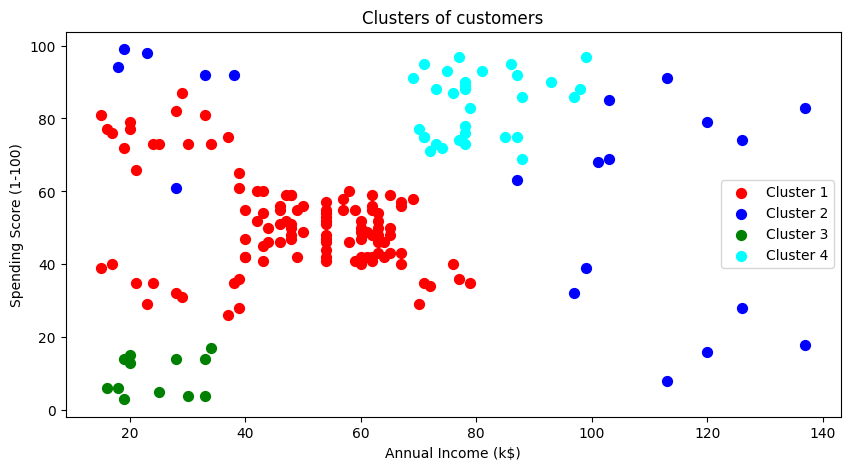

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_db == 0, 0], X[y_db== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_db == -1, 0], X[y_db== -1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_db == 1, 0], X[y_db== 1, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_db == 2, 0], X[y_db== 2, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Conclusion:
The customers can be segmented into three main groups based on their spending behavior and income, with a set of outliers that do not fit well into these clusters. The plot and the DBSCAN output help in understanding the segmentation which can be very useful for targeted marketing and understanding customer behavior. However, there appears to be a discrepancy in cluster labeling between the DBSCAN output and the plot that needs to be rectified. The absence of cluster 0 in the plot suggests either a plotting error or a conceptual mismatch that should be investigated further.

## Finding the best values for eps and min_samples in DBSCAN is often an iterative process that involves domain knowledge and experimentation. Here are several methods to help determine appropriate values for these parameters:


*   Nearest Neighbors Plot:

    1-k-distance Graph:
This is a popular method for finding a suitable eps value. Plot the distance to the k-th nearest neighbor for each point, sorted in ascending order. k should be set to min_samples - 1. The point where the curve starts to rise steeply (the "elbow") can be used as an eps value.

    2-Silhouette Score:
This measure evaluates how close each point in one cluster is to points in the neighboring clusters. It’s a useful metric to consider for evaluating the quality of clusters, although it might not always be applicable for DBSCAN due to the presence of noise points.

*   Grid Search:

You can perform a grid search over a range of eps and min_samples values, then choose the combination that maximizes a clustering metric like Silhouette Score, Calinski-Harabasz Index, or Davies-Bouldin Index. However, some of these metrics may not handle noise points well, which are common in DBSCAN.




## Nearest Neighbors Plot:
###k-distance Graph


In [49]:
from sklearn.neighbors import NearestNeighbors

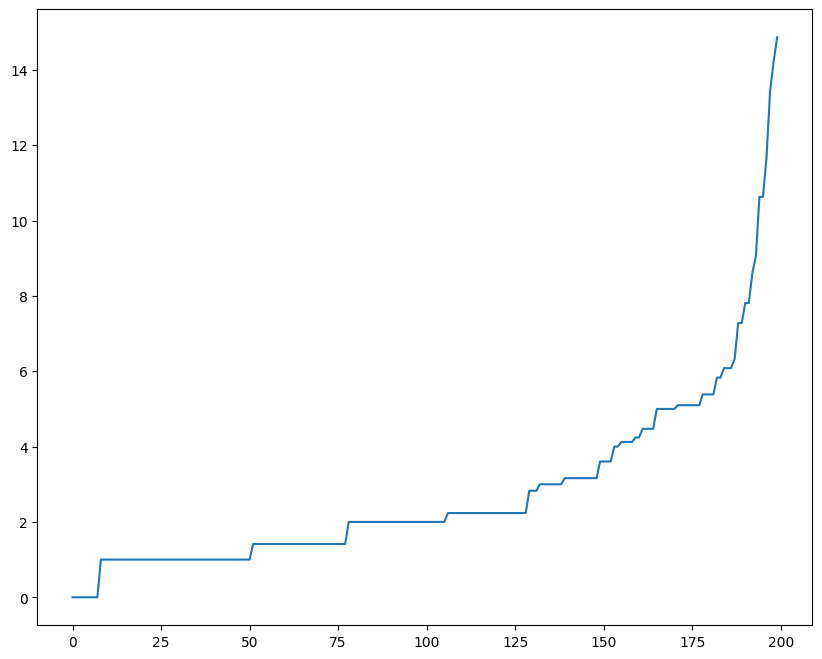

In [50]:
ep,count = NearestNeighbors(n_neighbors=20).fit(X).kneighbors(X)
ep = np.sort(ep, axis=0)
plt.figure(figsize=(10,8))
plt.plot(ep[:,1])
plt.show()

## To choose eps, based on the "elbow" graph, which is the point at which the rate of increase sharply changes. This often corresponds to the optimal eps value for DBSCAN, as it indicates the distance at which points start to be considered part of separate clusters rather than the same cluster. It seems that from 6 to 10 values the graph starts to steepen before the sharp increase, so we consider eps 6 to 10.

In [52]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [53]:
min_samples = range(2,10)
eps = np.arange(6,10, 0.25)
output = []
for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(eps = ep,min_samples=ms).fit(X).labels_
        score = metrics.silhouette_score(X, labels)
        output.append((ms, ep, score))
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.480431771178107
min_samples: 3
eps: 9.25


## Check DBSCAN Model with the new values:

In [54]:
db=DBSCAN(eps=9.25,min_samples=3)
db.fit(X)
tlabels = db.labels_
print(tlabels)

[ 0  1  2  1  0  1  2  3  2  1  2  3  2  1  2  1  0  1  0  3  0  1  2  1
  2  1  0  1  0  1  2  1  2  1  2  1  2  1  4  1  4  1  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  4  5  4  5  6  5  6  5  4  5  6  5  6  5  6  5  6  5  4  5
  6  5  4  5  6  5  6  5  6  5  6  5  6  5  6  5  4  5  6  5  6  5  6  5
  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6 -1  6  5  6 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [56]:
y_db=db.fit_predict(X)

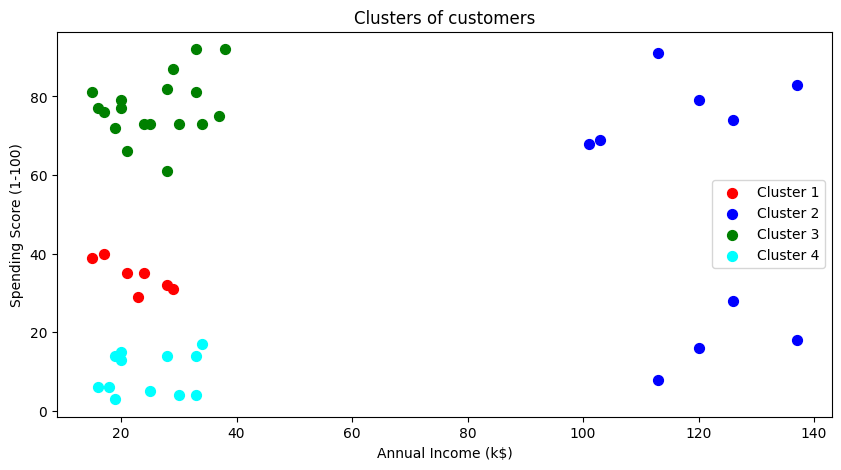

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_db == 0, 0], X[y_db== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_db == -1, 0], X[y_db== -1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_db == 1, 0], X[y_db== 1, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_db == 2, 0], X[y_db== 2, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()